In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load
from sklearn.preprocessing import StandardScaler

In [484]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [486]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [487]:
df['sex'] = pd.get_dummies(df['sex'], dtype=int, drop_first=True)
df['smoker'] = pd.get_dummies(df['smoker'], dtype=int, drop_first=True)
df = pd.get_dummies(df, columns=['region'], prefix='region',dtype=int)

#df['region'] = pd.get_dummies(df['region'], dtype=int, drop_first=False)

In [488]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int32  
 7   region_northwest  1338 non-null   int32  
 8   region_southeast  1338 non-null   int32  
 9   region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(6), int64(2)
memory usage: 73.3 KB


<Axes: >

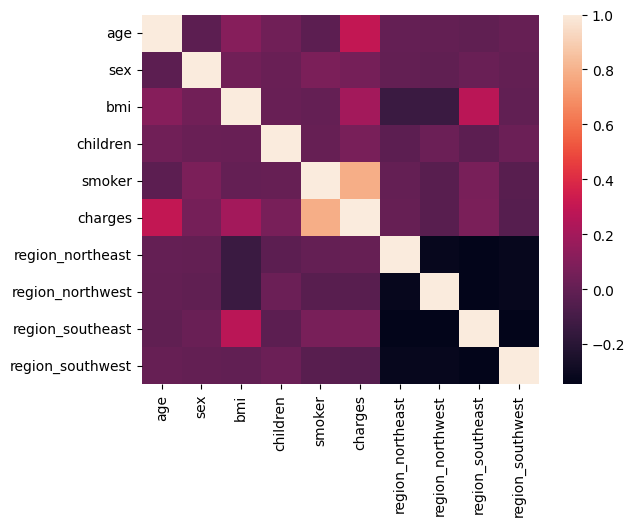

In [490]:
sns.heatmap(df.corr())

In [491]:
#df = df[df['charges'] <= 50000]

X = df.drop(['charges'], axis=1)
y = df['charges']

In [492]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

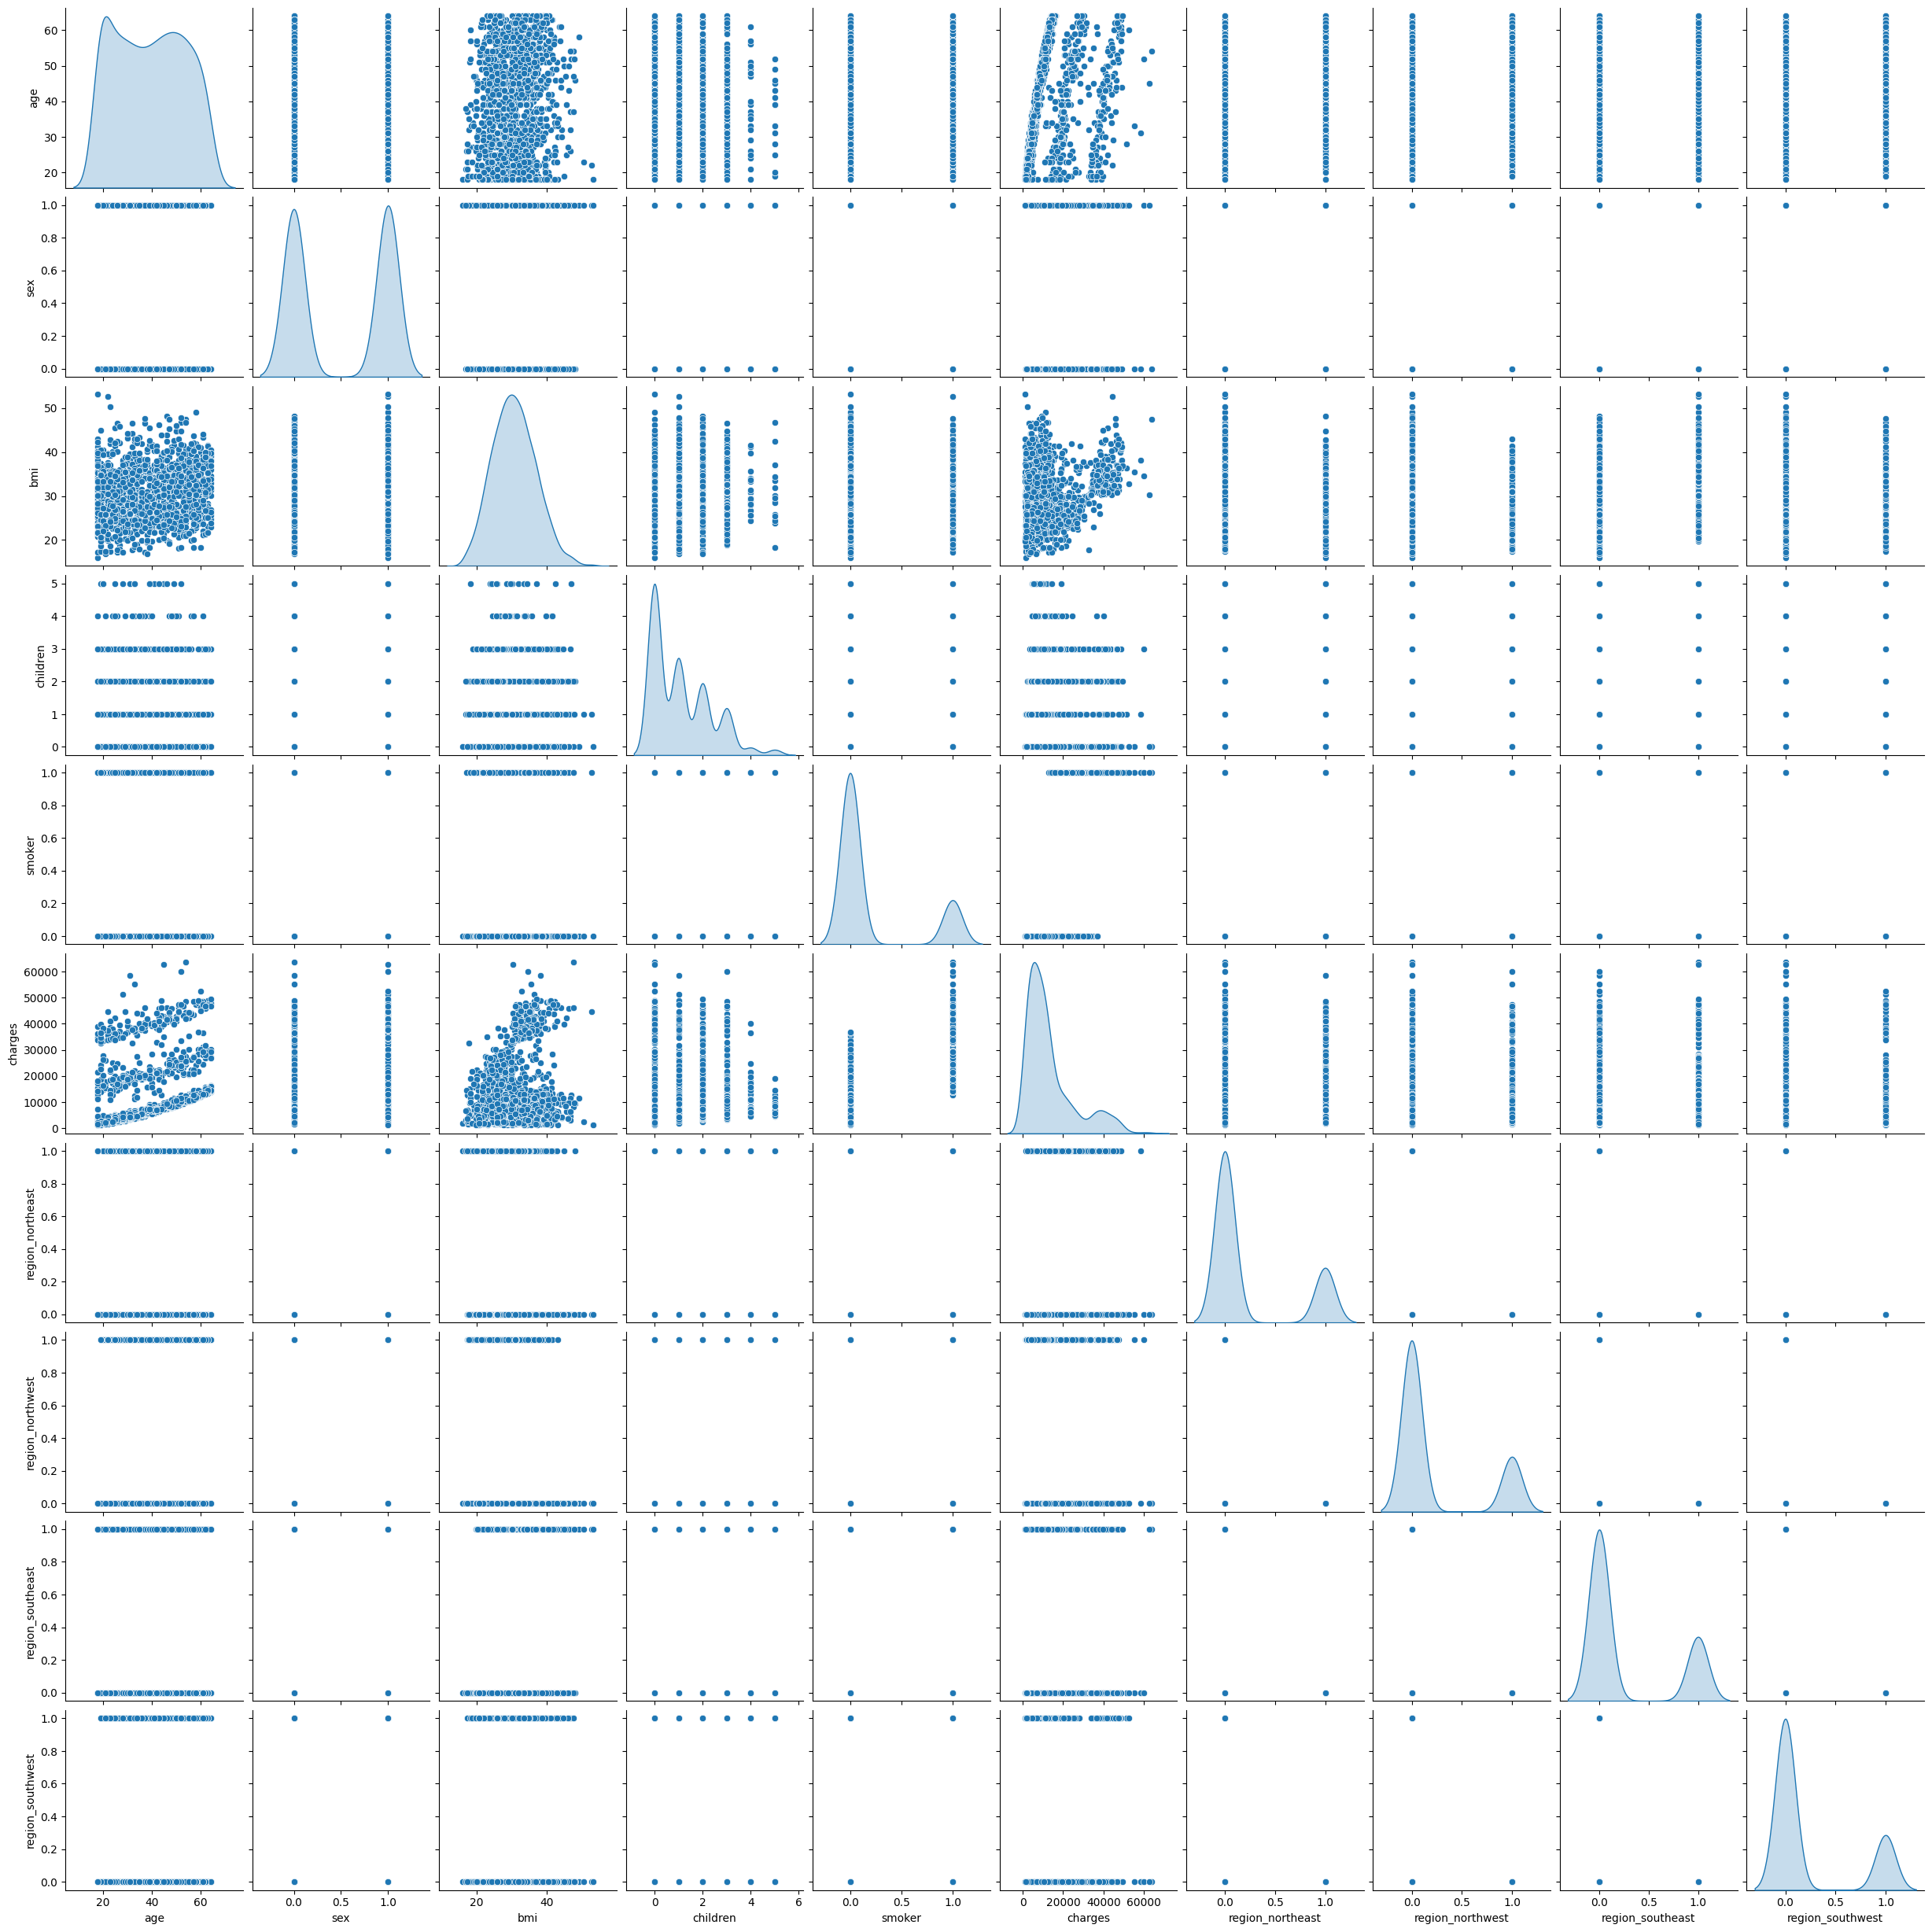

In [542]:
sns.pairplot(data=df,diag_kind="kde")

In [544]:
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [494]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_X = polynomial_converter.fit_transform(X)

In [495]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3, random_state=101)

In [496]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [497]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [498]:
y_pred = model.predict(X_test)

In [499]:
MAE = mean_absolute_error(y_true=y_test,y_pred=y_pred)
MAE

2864.30185877159

In [500]:
MSE = mean_squared_error(y_true=y_test,y_pred=y_pred)
MSE

22980782.587883692

In [501]:
RMSE = np.sqrt(MSE)
RMSE

4793.827550912078

In [502]:
tolerance = RMSE / y.mean()
tolerance

0.3612415230753058

In [503]:
r2_score = r2_score(y_true=y_test,y_pred=y_pred)
r2_score

0.8364091333906899

In [504]:
mean_charges = df["charges"].mean()

In [505]:
mean_charges_male = df[df['sex'] == 1]['charges'].mean()
mean_charges_female = df[df['sex'] == 0]['charges'].mean()

print("Mean charges for males:", mean_charges_male)
print("Mean charges for females:", mean_charges_female)

Mean charges for males: 13956.751177721893
Mean charges for females: 12569.578843835347


In [506]:
# Step#8 : Bias-Variation trade-off 

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,11):
    # create poly-convertor
    polynomial_convertor = PolynomialFeatures(degree=d,include_bias=False)
    # Create our Poly X
    poly_features = polynomial_convertor.fit_transform(X)
    # train_test_split
    X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=101)
    # Train our model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    #Calculate and collect RMSE
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = mean_squared_error(y_train,train_pred)**0.5
    test_RMSE = mean_squared_error(y_test,test_pred)**0.5

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

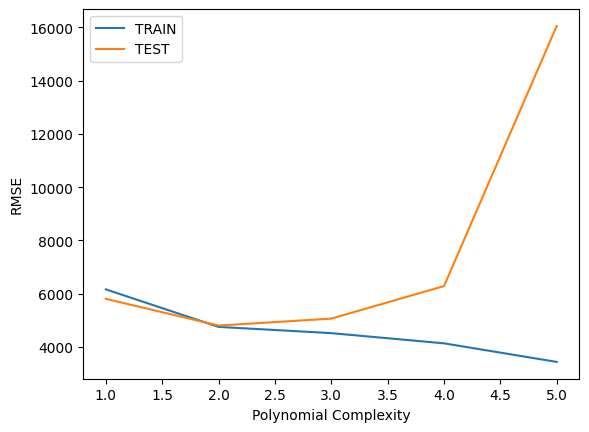

In [507]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [508]:
# # Step 8/9 : choose right degree (3) Save model after we get OK for this result

final_poly_convertor = PolynomialFeatures(degree=2,include_bias=False)
final_model = LinearRegression()
poly_X = final_poly_convertor.fit_transform(X)
final_model.fit(poly_X,y)

LinearRegression()

In [509]:
dump(final_model,"insurance_model_fin_2024_01_23.joblib")

['insurance_model_fin_2024_01_23.joblib']

In [510]:
dump(final_poly_convertor,"insurance_converter_fin_2024_01_18.joblib")

['insurance_converter_fin_2024_01_18.joblib']

In [511]:
loaded_model = load("insurance_model_fin_2024_01_23.joblib")
loaded_conv = load("insurance_converter_fin_2024_01_18.joblib")

In [529]:
df.head(10)

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
5,31,0,25.740,0,0,3756.62160,0,0,1,0
6,46,0,33.440,1,0,8240.58960,0,0,1,0
7,37,0,27.740,3,0,7281.50560,0,1,0,0
8,37,1,29.830,2,0,6406.41070,1,0,0,0
9,60,0,25.840,0,0,28923.13692,0,1,0,0


In [541]:
test_0 = [[19,0,27.9,0,1,0,0,0,1]]
test_2 = [[28,1,33,3,0,0,0,1,0]]
test_3 = [[33,1,22.705,0,0,0,1,0,0]]
test_4 = [[32,1,28.880,0,0,0,1,0,0]]
test_9 = [[60,0,25.840,0,0,1,0,0,0]]
test_poly = loaded_conv.transform(test_4)
test_poly
result = loaded_model.predict(test_poly)
print(result)
print(result/df['charges'].iloc[4])
print(result-df['charges'].iloc[4])

[4823.15793365]
[1.24730761]
[956.30273365]


c:\Users\ericb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
